In [10]:
from final import *

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/jenniferarty/Desktop/projects/wine-reviews/final.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['Gen_Label'] = category_labels


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
import random
random.seed(0)
from keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation


In [21]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
*The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [121]:
len(df['variety'].unique())

256

In [11]:
df_wine= df[['description','category']]


In [46]:
# wine["description"]

In [4]:
df_wine.index= range(len(df_wine))

In [30]:
df_wine= df_wine.dropna()


In [31]:
df_wine.isnull().sum()

description    0
category       0
dtype: int64

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords 

In [32]:
#take random sample of 10000
wine = df_wine.sample(n=10000, random_state=0)
wine.index =range(10000)
category = wine["category"]
reviews = wine["description"]

In [32]:
# # def filter_stop_words(train_sentences, stop_words):
# #     update_review=[]
# #     for i, sentence in enumerate(train_sentences):
# #         new_sent = [word for word in sentence.split() if word not in stop_words]
# #         train_sentences[i] = ' '.join(new_sent)
# #         update_review.append(train_sentences)
# #     return update_review

# # stop =stopwords.words("english")
# # stop.append('A')
# # stop.append('As')
# # stop.append("It's")
# # stop.append("This")
# # stop.append("The")
# stop=set(stop)
# # test2= filter_stop_words(test, stop_words)
# reviews= wine["description"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [20]:
# reviews

In [33]:
tokenizer =Tokenizer(num_words=2000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

In [34]:
#convert our text data from text to a vectorized matrix.
one_hot_results= tokenizer.texts_to_matrix(reviews, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results) # Expected Results (10000, 5000)

(10000, 2000)

In [35]:
#one hot encoding of wine categories 
le = preprocessing.LabelEncoder()
le.fit(category)


LabelEncoder()

In [36]:
# transform cateogry into a numeric vector
category_cat = le.transform(category)
category_cat

array([ 5,  5, 15, ...,  3, 15,  3])

In [37]:
#change to one hote encoding wiht keras 
category_onehot =to_categorical(category_cat)
category_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
np.shape(category_onehot)

(10000, 19)

In [39]:
# Train - test split. create training set and remove from test set 
#reviews
test_index = random.sample(range(1,10000), 1500)
test = one_hot_results[test_index]

# This line returns a version of our one_hot_results that has every item with an index in test_index removed
train = np.delete(one_hot_results, test_index, 0)

In [40]:
#train test split categories and remove test set from train set 
label_test = category_onehot[test_index]
label_train = np.delete(category_onehot,test_index,0)

In [80]:
print('label test {}'.format(label_test.shape)) # Expected Output: (1500, 7)
print('label train {}'.format(label_train.shape)) # Expected Output: (8500, 7)
print('test {}'.format(test.shape)) # Expected Output: (1500, 2000)
print('train {}'.format(train.shape)) # Expected Output: (8500, 2000)

label test (1500, 19)
label train (8500, 19)
test (1500, 2000)
train (8500, 2000)


In [41]:
#running models and creating validation set 
random.seed(0)
val = train[:1000]
train_final = train[1000:]
label_val = label_train[:1000]
label_train_final = label_train[1000:]

In [42]:
print(val.shape)
print(label_val.shape)

(1000, 2000)
(1000, 19)


In [83]:
#Creating model Sequential with reul and no regularization, epoachs 200 batch 32 
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dense(50,activation='relu'))
model.add(Dense(19, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_val = model.fit(train_final,
                    label_train_final,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/100
7500/7500 [==============================] - 1s 196us/step - loss: 1.7598 - acc: 0.4679 - val_loss: 1.2568 - val_acc: 0.5890
Epoch 2/100
7500/7500 [==============================] - 1s 134us/step - loss: 0.9562 - acc: 0.7004 - val_loss: 1.1142 - val_acc: 0.6510
Epoch 3/100
7500/7500 [==============================] - 1s 134us/step - loss: 0.6318 - acc: 0.8048 - val_loss: 1.1488 - val_acc: 0.6350
Epoch 4/100
7500/7500 [==============================] - 1s 132us/step - loss: 0.4204 - acc: 0.8765 - val_loss: 1.2550 - val_acc: 0.6370
Epoch 5/100
7500/7500 [==============================] - 1s 135us/step - loss: 0.2670 - acc: 0.9303 - val_loss: 1.4200 - val_acc: 0.6170
Epoch 6/100
7500/7500 [==============================] - 1s 132us/step - loss: 0.1603 - acc: 0.9665 - val_loss: 1.5561 - val_acc: 0.6060
Epoch 7/100
7500/7500 [==============================] - 1s 138us/step - loss: 0.0899 - acc: 0.9869 - val_loss: 1.7441 - val_acc: 

Epoch 59/100
7500/7500 [==============================] - 1s 145us/step - loss: 3.2147e-06 - acc: 1.0000 - val_loss: 4.0115 - val_acc: 0.5880
Epoch 60/100
7500/7500 [==============================] - 1s 142us/step - loss: 2.8201e-06 - acc: 1.0000 - val_loss: 4.0300 - val_acc: 0.5880
Epoch 61/100
7500/7500 [==============================] - 1s 139us/step - loss: 2.4719e-06 - acc: 1.0000 - val_loss: 4.0541 - val_acc: 0.5900
Epoch 62/100
7500/7500 [==============================] - 1s 141us/step - loss: 2.1739e-06 - acc: 1.0000 - val_loss: 4.0743 - val_acc: 0.5890
Epoch 63/100
7500/7500 [==============================] - 1s 130us/step - loss: 1.9087e-06 - acc: 1.0000 - val_loss: 4.0920 - val_acc: 0.5890
Epoch 64/100
7500/7500 [==============================] - 1s 135us/step - loss: 1.6815e-06 - acc: 1.0000 - val_loss: 4.1085 - val_acc: 0.5890
Epoch 65/100
7500/7500 [==============================] - 1s 138us/step - loss: 1.4810e-06 - acc: 1.0000 - val_loss: 4.1298 - val_acc: 0.5900
Epoch 

In [84]:
#Now, let's get the final results on the training and testing sets 
results_train = model.evaluate(train_final, label_train_final)

7500/7500 [==============================] - 0s 44us/step


In [85]:
#final test results 
results_test = model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 45us/step


In [86]:
#print results 
print('Training results without regularization: \n Loss:{} \n Accuracy :{}'.format(results_train[0],results_train[1],) )
print('Test results without regularization:\n Loss:{} \n Accuracy:{}'.format(results_test[0] ,results_test[1]))

Training results without regularization: 
 Loss:1.2140274053156948e-07 
 Accuracy :1.0
Test results without regularization:
 Loss:4.30288648223877 
 Accuracy:0.6086666665077209


In [87]:
model_val_dict =model_val.history

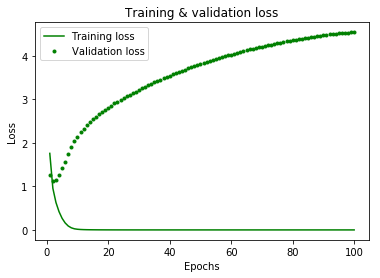

In [88]:
plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'g.', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

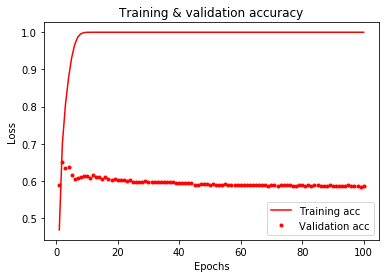

In [89]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'r.', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
#Early Stopping at 50 epochs
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dense(50,activation='relu'))
model.add(Dense(19, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_val = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/60
7500/7500 [==============================] - 2s 221us/step - loss: 1.7411 - acc: 0.4636 - val_loss: 1.2196 - val_acc: 0.6020
Epoch 2/60
7500/7500 [==============================] - 1s 131us/step - loss: 0.9437 - acc: 0.7005 - val_loss: 1.0931 - val_acc: 0.6280
Epoch 3/60
7500/7500 [==============================] - 1s 130us/step - loss: 0.6237 - acc: 0.8032 - val_loss: 1.1450 - val_acc: 0.6290
Epoch 4/60
7500/7500 [==============================] - 1s 128us/step - loss: 0.4146 - acc: 0.8784 - val_loss: 1.2600 - val_acc: 0.6260
Epoch 5/60
7500/7500 [==============================] - 1s 136us/step - loss: 0.2639 - acc: 0.9307 - val_loss: 1.3820 - val_acc: 0.6300
Epoch 6/60
7500/7500 [==============================] - 1s 136us/step - loss: 0.1609 - acc: 0.9657 - val_loss: 1.5785 - val_acc: 0.6160
Epoch 7/60
7500/7500 [==============================] - 1s 134us/step - loss: 0.0896 - acc: 0.9867 - val_loss: 1.7078 - val_acc: 0.6200


In [91]:
#Early Stoping final results on the training and testing sets 
results_train_early = model.evaluate(train_final, label_train_final)

7500/7500 [==============================] - 0s 49us/step


In [92]:
#Early Stopping final test results 
results_test_early = model.evaluate(test,label_test)


1500/1500 [==============================] - 0s 44us/step


In [93]:
#print results 
print('Training results- Early Stopping: \n Loss:{} \n Accuracy :{}'.format(results_train_early[0],results_train_early[1],) )
print('Test results -Early Stopping:\n Loss:{} \n Accuracy:{}'.format(results_test_early[0] ,results_test_early[1]))

Training results- Early Stopping: 
 Loss:2.8317204816630692e-06 
 Accuracy :1.0
Test results -Early Stopping:
 Loss:3.7990979766845703 
 Accuracy:0.603333333492279


In [94]:
#Drop out method
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dropout(.3))
model.add(Dense(50,activation='relu'))
model.add(Dropout(.3))
model.add(Dense(19, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
drop_model = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 2s 218us/step - loss: 1.9893 - acc: 0.3951 - val_loss: 1.4058 - val_acc: 0.5370
Epoch 2/75
7500/7500 [==============================] - 1s 142us/step - loss: 1.2742 - acc: 0.5944 - val_loss: 1.1736 - val_acc: 0.6330
Epoch 3/75
7500/7500 [==============================] - 1s 136us/step - loss: 0.9976 - acc: 0.6868 - val_loss: 1.1084 - val_acc: 0.6320
Epoch 4/75
7500/7500 [==============================] - 1s 131us/step - loss: 0.8036 - acc: 0.7468 - val_loss: 1.1163 - val_acc: 0.6330
Epoch 5/75
7500/7500 [==============================] - 1s 146us/step - loss: 0.6759 - acc: 0.7899 - val_loss: 1.1558 - val_acc: 0.6430
Epoch 6/75
7500/7500 [==============================] - 1s 146us/step - loss: 0.5501 - acc: 0.8251 - val_loss: 1.2326 - val_acc: 0.6320
Epoch 7/75
7500/7500 [==============================] - 1s 147us/step - loss: 0.4704 - acc: 0.8547 - val_loss: 1.2768 - val_acc: 0.6280


In [95]:
results_train_drop= model.evaluate(train_final, label_train_final)
results_test_drop = model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 46us/step


In [96]:
print('Training results Drop Model: \n Loss:{} \n Accuracy :{}'.format(results_train_drop[0],results_train_drop[1],) )
print('Test results Drop Model:\n Loss:{} \n Accuracy:{}'.format(results_test_drop[0] ,results_test_drop[1]))

Training results Drop Model: 
 Loss:0.0002415136418567272 
 Accuracy :1.0
Test results Drop Model:
 Loss:3.186903839747111 
 Accuracy:0.6379999998410543


In [97]:
#L2
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,)))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(19,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_reg = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))


Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 2s 217us/step - loss: 2.2891 - acc: 0.4557 - val_loss: 1.7213 - val_acc: 0.5850
Epoch 2/75
7500/7500 [==============================] - 1s 143us/step - loss: 1.5783 - acc: 0.6289 - val_loss: 1.6034 - val_acc: 0.6250
Epoch 3/75
7500/7500 [==============================] - 1s 143us/step - loss: 1.4690 - acc: 0.6677 - val_loss: 1.5806 - val_acc: 0.6170
Epoch 4/75
7500/7500 [==============================] - 1s 147us/step - loss: 1.4022 - acc: 0.6928 - val_loss: 1.5547 - val_acc: 0.6270
Epoch 5/75
7500/7500 [==============================] - 1s 144us/step - loss: 1.3603 - acc: 0.7041 - val_loss: 1.5337 - val_acc: 0.6300
Epoch 6/75
7500/7500 [==============================] - 1s 149us/step - loss: 1.3249 - acc: 0.7104 - val_loss: 1.5388 - val_acc: 0.6250
Epoch 7/75
7500/7500 [==============================] - 1s 147us/step - loss: 1.2967 - acc: 0.7193 - val_loss: 1.5462 - val_acc: 0.6230


In [98]:
#l2 training test 
results_train_L2= model.evaluate(train_final, label_train_final)
results_test_L2 = model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 51us/step


In [99]:
#print l2
print('Training results L2 Model: \n Loss:{} \n Accuracy :{}'.format(results_train_L2[0],results_train_L2[1],) )
print('Test results L2 Model:\n Loss:{} \n Accuracy:{}'.format(results_test_L2[0] ,results_test_L2[1]))

Training results L2 Model: 
 Loss:0.5064801580905914 
 Accuracy :0.9810666666666666
Test results L2 Model:
 Loss:1.8648234329223632 
 Accuracy:0.6219999996821085


In [106]:
#drop .5
model= Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dropout(.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(19, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
drop_model_5 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))


Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 2s 256us/step - loss: 2.2287 - acc: 0.3241 - val_loss: 1.6528 - val_acc: 0.4750
Epoch 2/75
7500/7500 [==============================] - 1s 144us/step - loss: 1.5925 - acc: 0.5005 - val_loss: 1.3321 - val_acc: 0.5720
Epoch 3/75
7500/7500 [==============================] - 1s 134us/step - loss: 1.3098 - acc: 0.5819 - val_loss: 1.2207 - val_acc: 0.5920
Epoch 4/75
7500/7500 [==============================] - 1s 141us/step - loss: 1.1467 - acc: 0.6339 - val_loss: 1.1686 - val_acc: 0.6220
Epoch 5/75
7500/7500 [==============================] - 1s 142us/step - loss: 1.0034 - acc: 0.6763 - val_loss: 1.1547 - val_acc: 0.6320
Epoch 6/75
7500/7500 [==============================] - 1s 143us/step - loss: 0.9291 - acc: 0.6992 - val_loss: 1.1438 - val_acc: 0.6360
Epoch 7/75
7500/7500 [==============================] - 1s 146us/step - loss: 0.8089 - acc: 0.7405 - val_loss: 1.1585 - val_acc: 0.6380


In [107]:
# Drop 50 
results_train_drop_5= model.evaluate(train_final, label_train_final)
results_test_drop_5= model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 45us/step


In [108]:
#print l1
print('Training results Drop Model 50%: \n Loss:{} \n Accuracy :{}'.format(results_train_drop_5[0],results_train_drop_5[1],) )
print('Test results  Drop Model 50%:\n Loss:{} \n Accuracy:{}'.format(results_test_drop_5[0] ,results_test_drop_5[1]))

Training results Drop Model 50%: 
 Loss:0.007141579612173761 
 Accuracy :0.9985333333333334
Test results  Drop Model 50%:
 Loss:2.9891765251159668 
 Accuracy:0.6460000004768371


In [103]:
#L1 with Dropout 
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,)))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model.add(Dense(19,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L1_reg = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 2s 256us/step - loss: 5.7067 - acc: 0.2887 - val_loss: 2.4692 - val_acc: 0.3790
Epoch 2/75
7500/7500 [==============================] - 1s 138us/step - loss: 2.2647 - acc: 0.4193 - val_loss: 2.1781 - val_acc: 0.4080
Epoch 3/75
7500/7500 [==============================] - 1s 145us/step - loss: 2.0910 - acc: 0.4541 - val_loss: 2.0732 - val_acc: 0.4360
Epoch 4/75
7500/7500 [==============================] - 1s 159us/step - loss: 2.0052 - acc: 0.4685 - val_loss: 2.0105 - val_acc: 0.4540
Epoch 5/75
7500/7500 [==============================] - 1s 155us/step - loss: 1.9586 - acc: 0.4751 - val_loss: 1.9734 - val_acc: 0.4640
Epoch 6/75
7500/7500 [==============================] - 1s 150us/step - loss: 1.9322 - acc: 0.4797 - val_loss: 1.9470 - val_acc: 0.4740
Epoch 7/75
7500/7500 [==============================] - 1s 150us/step - loss: 1.9070 - acc: 0.4825 - val_loss: 1.9223 - val_acc: 0.4810


In [104]:
#l1
#l1 training test 
results_train_L1= model.evaluate(train_final, label_train_final)
results_test_L1= model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 68us/step


In [105]:
#l1
#print l1
print('Training results L1 Drop Model: \n Loss:{} \n Accuracy :{}'.format(results_train_L1[0],results_train_L1[1],) )
print('Test results  L1 Drop Model:\n Loss:{} \n Accuracy:{}'.format(results_test_L1[0] ,results_test_L1[1]))

Training results L1 Drop Model: 
 Loss:1.4909427564620972 
 Accuracy :0.6938666666666666
Test results  L1 Drop Model:
 Loss:1.6464287048975628 
 Accuracy:0.6366666661898295


In [112]:
#take random sample of 40000
wine2= df_wine.dropna()
wine2 = df_wine.sample(40000)
wine2.index = range(40000)
product = wine2["category"]
complaints =wine2["description"]

#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)
sequences = tokenizer.texts_to_sequences(complaints)
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)

#one-hot encoding of products
le = preprocessing.LabelEncoder()
le.fit(product)
list(le.classes_)
product_cat = le.transform(product) 
product_onehot = to_categorical(product_cat)

# train test split
test_index = random.sample(range(1,40000), 4000)
test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

#Validation set
random.seed(123)
val = train[:3000]
train_final = train[3000:]
label_val = label_train[:3000]
label_train_final = label_train[3000:]

In [115]:
#Drop out method with bigger database
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dropout(.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(18, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
drop_model2 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/200
33000/33000 [==============================] - 6s 188us/step - loss: 1.6842 - acc: 0.4679 - val_loss: 1.1527 - val_acc: 0.6263
Epoch 2/200
33000/33000 [==============================] - 5s 147us/step - loss: 1.2188 - acc: 0.6062 - val_loss: 1.0083 - val_acc: 0.6733
Epoch 3/200
33000/33000 [==============================] - 5s 158us/step - loss: 1.0810 - acc: 0.6514 - val_loss: 0.9671 - val_acc: 0.6810
Epoch 4/200
33000/33000 [==============================] - 5s 165us/step - loss: 0.9989 - acc: 0.6776 - val_loss: 0.9626 - val_acc: 0.6877
Epoch 5/200
33000/33000 [==============================] - 4s 132us/step - loss: 0.9391 - acc: 0.6971 - val_loss: 0.9578 - val_acc: 0.6857
Epoch 6/200
33000/33000 [==============================] - 5s 146us/step - loss: 0.8853 - acc: 0.7124 - val_loss: 0.9575 - val_acc: 0.6880
Epoch 7/200
33000/33000 [==============================] - 5s 145us/step - loss: 0.8403 - acc: 0.7295 - val_loss: 0.9

KeyboardInterrupt: 

In [116]:
results_train_drop_extended= model.evaluate(train_final, label_train_final)
results_test_drop_extended = model.evaluate(test,label_test)

4000/4000 [==============================] - 0s 84us/step


In [117]:
print('Training results- Drop Model Extended: \n Loss:{} \n Accuracy :{}'.format(results_train_drop_extended[0],results_train_drop_extended[1],) )
print('Test results -Drop Model Extended:\n Loss:{} \n Accuracy:{}'.format(results_test_drop_extended[0] ,results_test_drop_extended[1]))

Training results- Drop Model Extended: 
 Loss:0.06753153615309433 
 Accuracy :0.9854848484848485
Test results -Drop Model Extended:
 Loss:2.246895628929138 
 Accuracy:0.6865


In [174]:
#Drop out method with bigger database
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(19,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/75
33000/33000 [==============================] - 10s 297us/step - loss: 1.7243 - acc: 0.5795 - val_loss: 1.4868 - val_acc: 0.6527
Epoch 2/75
33000/33000 [==============================] - 10s 312us/step - loss: 1.4645 - acc: 0.6522 - val_loss: 1.4184 - val_acc: 0.6750
Epoch 3/75
33000/33000 [==============================] - 10s 299us/step - loss: 1.4086 - acc: 0.6603 - val_loss: 1.3748 - val_acc: 0.6740
Epoch 4/75
33000/33000 [==============================] - 9s 278us/step - loss: 1.3691 - acc: 0.6688 - val_loss: 1.3448 - val_acc: 0.6807
Epoch 5/75
33000/33000 [==============================] - 9s 285us/step - loss: 1.3389 - acc: 0.6754 - val_loss: 1.3194 - val_acc: 0.6843
Epoch 6/75
33000/33000 [==============================] - 9s 281us/step - loss: 1.3062 - acc: 0.6815 - val_loss: 1.3098 - val_acc: 0.6850
Epoch 7/75
33000/33000 [==============================] - 9s 277us/step - loss: 1.2783 - acc: 0.6855 - val_loss: 1.2936 

In [175]:
results_train_l2_extended= model.evaluate(train_final, label_train_final)
results_test_l2_extended = model.evaluate(test,label_test)

4000/4000 [==============================] - 1s 141us/step


In [188]:
print('Training results- Drop Model Extended: \n Loss:{} \n Accuracy :{}'.format(results_train_l2_extended[0],results_train_l2_extended[1])) 
print('Test results -Drop Model Extended:\n Loss:{} \n Accuracy:{}'.format(results_test_l2_extended[0] ,results_test_l2_extended[1]))

Training results- Drop Model Extended: 
 Loss:0.8451337846264695 
 Accuracy :0.823060606060606
Test results -Drop Model Extended:
 Loss:1.2341540246009826 
 Accuracy:0.68975


In [179]:
from keras import regularizers
random.seed(123)
model=Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.005),input_shape=(5000,)))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model.add(Dense(19, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L1_model = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/75
33000/33000 [==============================] - 7s 207us/step - loss: 13.1016 - acc: 0.2629 - val_loss: 3.1957 - val_acc: 0.2793
Epoch 2/75
33000/33000 [==============================] - 7s 199us/step - loss: 2.9729 - acc: 0.3252 - val_loss: 2.6824 - val_acc: 0.3850
Epoch 3/75
33000/33000 [==============================] - 7s 210us/step - loss: 2.5253 - acc: 0.4042 - val_loss: 2.2847 - val_acc: 0.4483
Epoch 4/75
33000/33000 [==============================] - 7s 204us/step - loss: 2.2044 - acc: 0.4336 - val_loss: 2.0385 - val_acc: 0.4717
Epoch 5/75
33000/33000 [==============================] - 7s 205us/step - loss: 2.0364 - acc: 0.4505 - val_loss: 1.9353 - val_acc: 0.4917
Epoch 6/75
33000/33000 [==============================] - 7s 204us/step - loss: 1.9601 - acc: 0.4626 - val_loss: 1.8768 - val_acc: 0.4977
Epoch 7/75
33000/33000 [==============================] - 7s 226us/step - loss: 1.9119 - acc: 0.4699 - val_loss: 1.8472 - 

In [180]:
results_train_l1_extended= model.evaluate(train_final, label_train_final)
results_test_l1_extended = model.evaluate(test,label_test)

4000/4000 [==============================] - 0s 92us/step


In [187]:
print('Training results- Drop Model Extended: \n Loss:{} \n Accuracy :{}'.format(results_train_l1_extended[0],results_train_l1_extended[1])) 
print('Test results -Drop Model Extended:\n Loss:{} \n Accuracy:{}'.format(results_test_l1_extended[0] ,results_test_l1_extended[1]))

Training results- Drop Model Extended: 
 Loss:1.5055514525211218 
 Accuracy :0.6286060606060606
Test results -Drop Model Extended:
 Loss:1.5350969915390014 
 Accuracy:0.62475


In [182]:
#Drop out method with bigger database
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dropout(.5))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(.5))
model.add(Dense(19,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_with_drop = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/75
33000/33000 [==============================] - 11s 319us/step - loss: 2.0270 - acc: 0.4724 - val_loss: 1.5934 - val_acc: 0.6023
Epoch 2/75
33000/33000 [==============================] - 10s 293us/step - loss: 1.7393 - acc: 0.5528 - val_loss: 1.5469 - val_acc: 0.6367
Epoch 3/75
33000/33000 [==============================] - 10s 294us/step - loss: 1.6991 - acc: 0.5722 - val_loss: 1.5197 - val_acc: 0.6370
Epoch 4/75
33000/33000 [==============================] - 9s 264us/step - loss: 1.6780 - acc: 0.5821 - val_loss: 1.4893 - val_acc: 0.6403
Epoch 5/75
33000/33000 [==============================] - 9s 272us/step - loss: 1.6576 - acc: 0.5878 - val_loss: 1.4809 - val_acc: 0.6517
Epoch 6/75
33000/33000 [==============================] - 10s 300us/step - loss: 1.6510 - acc: 0.5932 - val_loss: 1.4809 - val_acc: 0.6463
Epoch 7/75
33000/33000 [==============================] - 9s 271us/step - loss: 1.6371 - acc: 0.5953 - val_loss: 1.4679

In [184]:
results_train_l2_extended_drop= model.evaluate(train_final, label_train_final)
results_test_l2_extended_drop = model.evaluate(test,label_test)

4000/4000 [==============================] - 0s 122us/step


In [186]:
print('Training results- Drop Model Extended: \n Loss:{} \n Accuracy :{}'.format(results_train_l2_extended_drop[0],results_train_l2_extended_drop[1])) 
print('Test results -Drop Model Extended:\n Loss:{} \n Accuracy:{}'.format(results_test_l2_extended_drop[0] ,results_test_l2_extended_drop[1]))

Training results- Drop Model Extended: 
 Loss:1.313795260371584 
 Accuracy :0.7240909090909091
Test results -Drop Model Extended:
 Loss:1.4547750024795532 
 Accuracy:0.67625


In [189]:
#Drop out method with bigger database
from keras.layers import Dropout
model= Sequential()
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dropout(.3))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(.3))
model.add(Dense(19,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_with_drop = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/75
33000/33000 [==============================] - 10s 313us/step - loss: 1.8832 - acc: 0.5208 - val_loss: 1.5373 - val_acc: 0.6373
Epoch 2/75
33000/33000 [==============================] - 9s 267us/step - loss: 1.6249 - acc: 0.5948 - val_loss: 1.4762 - val_acc: 0.6570
Epoch 3/75
33000/33000 [==============================] - 10s 298us/step - loss: 1.5786 - acc: 0.6132 - val_loss: 1.4421 - val_acc: 0.6567
Epoch 4/75
33000/33000 [==============================] - 9s 283us/step - loss: 1.5504 - acc: 0.6208 - val_loss: 1.4289 - val_acc: 0.6597
Epoch 5/75
33000/33000 [==============================] - 10s 301us/step - loss: 1.5320 - acc: 0.6287 - val_loss: 1.4165 - val_acc: 0.6707
Epoch 6/75
33000/33000 [==============================] - 10s 302us/step - loss: 1.5211 - acc: 0.6363 - val_loss: 1.4159 - val_acc: 0.6780
Epoch 7/75
33000/33000 [==============================] - 10s 305us/step - loss: 1.5109 - acc: 0.6404 - val_loss: 1.391

In [198]:
wine_cat_2 = {'red_dry' : ['tannat', 'nebbiolo','sagrantino','cabernet franc','chianti', 'petit verdot','petite verdot','bordeaux','meritage', 'tempranillo','tempranillo blend','tinto fino','tinta de toro', 'french mourvedre', 'aglianico', 'barbera', 'montepulcaiano','red blend', 'corvina, rondinella, molinara','montepulciano',
'sangiovese','carmenere','cabernet france','cabernet sauvignon','cabernet','gamay','mencía','mencia','valpolicella','rhone_blend','mourvèdre','rhône','beaujolais','burgundy','syrah','trincadeira','pinot noir','pinot nero','dolcetto','garnacha', 'bonarda','amorone della valpolicella','negroamaro','nerello mascalese','supertuscans',
'merlot', 'alfrocheiro','alcicante bouschet','shiraz','monastrell','malbec',"nero d'avola",'petite sirah','primitivo','zinfandel','grenache','g-s-m','g','touriga nacional'],'red_sweet':['sangiovese grosso','lambrusco','brachetto','port','banyuls','maury'],'white_dry': ['pinot grigio','pinot blanc',
'albarino','garganega','dry furmit','gavi','muscadet','melon','muscat','muskat','chablis','grenache blanc','macabeo','vinho verde','grillo','arinto','sauvignon blanc','friulano','fumé blanc','fume blanc','sauvignon gris','sauvignon','verdejo','grüner veltliner','verdicchio','colombard','vermentino',
'turbiana','vernaccia','chenin blanc','torrontés','fiano','albariño','chardonnay','marsanne','roussanne','semillon','trebbiano','viura','pinot gris','sémillon','pinot blanc','pinot bianco','viognier','dry riesling'],'white_sweet':[ 'riesling','johannisberg riesling','chenin blanc','torrontés','müller-thurgau','moscato','gewürztraminer','sauternes','tokaji','white port', 'moscatel dessert wine', 'passito wines','vin santo','white blend'], 'rose':
['rose','rosé','rosato'],'sparkling':['champagne','prosecco','cava','sparkling blend','sparkling wine','champagne blend','glera']}

In [214]:
wine_cat_2

{'red_dry': ['tannat',
  'nebbiolo',
  'sagrantino',
  'cabernet franc',
  'chianti',
  'petit verdot',
  'petite verdot',
  'bordeaux',
  'meritage',
  'tempranillo',
  'tempranillo blend',
  'tinto fino',
  'tinta de toro',
  'french mourvedre',
  'aglianico',
  'barbera',
  'montepulcaiano',
  'red blend',
  'corvina, rondinella, molinara',
  'montepulciano',
  'sangiovese',
  'carmenere',
  'cabernet france',
  'cabernet sauvignon',
  'cabernet',
  'gamay',
  'mencía',
  'mencia',
  'valpolicella',
  'rhone_blend',
  'mourvèdre',
  'rhône',
  'beaujolais',
  'burgundy',
  'syrah',
  'trincadeira',
  'pinot noir',
  'pinot nero',
  'dolcetto',
  'garnacha',
  'bonarda',
  'amorone della valpolicella',
  'negroamaro',
  'nerello mascalese',
  'supertuscans',
  'merlot',
  'alfrocheiro',
  'alcicante bouschet',
  'shiraz',
  'monastrell',
  'malbec',
  "nero d'avola",
  'petite sirah',
  'primitivo',
  'zinfandel',
  'grenache',
  'g-s-m',
  'g',
  'touriga nacional'],
 'red_sweet': [

In [215]:
def update_dict_2 (dict):
    update= {}
    for i in list(dict.keys()):
        for wine in wine_cat_2[i]:
            update[wine]=i
    return update
#creating update dictionary to add new categories
update = update_dict_2(wine_cat_2)

In [216]:
update

{'tannat': 'red_dry',
 'nebbiolo': 'red_dry',
 'sagrantino': 'red_dry',
 'cabernet franc': 'red_dry',
 'chianti': 'red_dry',
 'petit verdot': 'red_dry',
 'petite verdot': 'red_dry',
 'bordeaux': 'red_dry',
 'meritage': 'red_dry',
 'tempranillo': 'red_dry',
 'tempranillo blend': 'red_dry',
 'tinto fino': 'red_dry',
 'tinta de toro': 'red_dry',
 'french mourvedre': 'red_dry',
 'aglianico': 'red_dry',
 'barbera': 'red_dry',
 'montepulcaiano': 'red_dry',
 'red blend': 'red_dry',
 'corvina, rondinella, molinara': 'red_dry',
 'montepulciano': 'red_dry',
 'sangiovese': 'red_dry',
 'carmenere': 'red_dry',
 'cabernet france': 'red_dry',
 'cabernet sauvignon': 'red_dry',
 'cabernet': 'red_dry',
 'gamay': 'red_dry',
 'mencía': 'red_dry',
 'mencia': 'red_dry',
 'valpolicella': 'red_dry',
 'rhone_blend': 'red_dry',
 'mourvèdre': 'red_dry',
 'rhône': 'red_dry',
 'beaujolais': 'red_dry',
 'burgundy': 'red_dry',
 'syrah': 'red_dry',
 'trincadeira': 'red_dry',
 'pinot noir': 'red_dry',
 'pinot nero': '

In [217]:
df_1 = wine_cat_df(update)

In [218]:
df_wine_update = mapping (df, update)

In [229]:
len(df_wine_update['category'].unique())

7

In [10]:
#take random sample of 40000

wine3 =df_wine.sample(40000)
wine3.index = range(40000)
product = wine3["category"]
complaints =wine3["description"]

#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)
sequences = tokenizer.texts_to_sequences(complaints)
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)

#one-hot encoding of products
le = preprocessing.LabelEncoder()
le.fit(product)
list(le.classes_)
product_cat = le.transform(product) 
product_onehot = to_categorical(product_cat)

# train test split
test_index = random.sample(range(1,40000), 4000)
test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

#Validation set
random.seed(0)
val = train[:3000]
train_final = train[3000:]
label_val = label_train[:3000]
label_train_final = label_train[3000:]

In [14]:
#Creating model Sequential with reul and no regularization, epoachs 200 batch 30 
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dense(50,activation='relu'))
model.add(Dense(18, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_val = model.fit(train_final,
                    label_train_final,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/100
33000/33000 [==============================] - 5s 149us/step - loss: 1.1976 - acc: 0.6150 - val_loss: 0.9655 - val_acc: 0.6827
Epoch 2/100
33000/33000 [==============================] - 4s 126us/step - loss: 0.8207 - acc: 0.7275 - val_loss: 0.9611 - val_acc: 0.6957
Epoch 3/100
33000/33000 [==============================] - 4s 115us/step - loss: 0.6882 - acc: 0.7674 - val_loss: 0.9808 - val_acc: 0.6937
Epoch 4/100
33000/33000 [==============================] - 4s 124us/step - loss: 0.5648 - acc: 0.8093 - val_loss: 1.0152 - val_acc: 0.6950
Epoch 5/100
33000/33000 [==============================] - 4s 127us/step - loss: 0.4439 - acc: 0.8508 - val_loss: 1.0943 - val_acc: 0.6967
Epoch 6/100
33000/33000 [==============================] - 4s 123us/step - loss: 0.3284 - acc: 0.8954 - val_loss: 1.2209 - val_acc: 0.6953
Epoch 7/100
33000/33000 [==============================] - 4s 126us/step - loss: 0.2238 - acc: 0.9338 - val_loss: 1.4

KeyboardInterrupt: 

In [15]:
#Now, let's get the final results on the training and testing sets 
results_train_big = model.evaluate(train_final, label_train_final)
results_test_big = model.evaluate(test,label_test)

4000/4000 [==============================] - 0s 44us/step


In [16]:
#print results 
print('Training results without regularization: \n Loss:{} \n Accuracy :{}'.format(results_train_big[0],results_train_big[1],) )
print('Test results without regularization:\n Loss:{} \n Accuracy:{}'.format(results_test_big[0] ,results_test_big[1]))

Training results without regularization: 
 Loss:1.2596809597887456e-07 
 Accuracy :1.0
Test results without regularization:
 Loss:3.9679316215515135 
 Accuracy:0.66525


In [18]:
#Big with Drop 
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(2000,))) 
model.add(Dropout(.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(18, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_val = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/75
33000/33000 [==============================] - 5s 148us/step - loss: 1.6826 - acc: 0.4678 - val_loss: 1.1543 - val_acc: 0.6280
Epoch 2/75
33000/33000 [==============================] - 5s 139us/step - loss: 1.2137 - acc: 0.6051 - val_loss: 1.0207 - val_acc: 0.6643
Epoch 3/75
33000/33000 [==============================] - 4s 136us/step - loss: 1.0800 - acc: 0.6512 - val_loss: 0.9768 - val_acc: 0.6867
Epoch 4/75
33000/33000 [==============================] - 5s 142us/step - loss: 0.9923 - acc: 0.6804 - val_loss: 0.9633 - val_acc: 0.6927
Epoch 5/75
33000/33000 [==============================] - 5s 144us/step - loss: 0.9311 - acc: 0.6996 - val_loss: 0.9852 - val_acc: 0.6937
Epoch 6/75
33000/33000 [==============================] - 4s 132us/step - loss: 0.8836 - acc: 0.7147 - val_loss: 0.9739 - val_acc: 0.7003
Epoch 7/75
33000/33000 [==============================] - 5s 139us/step - loss: 0.8368 - acc: 0.7257 - val_loss: 0.9794 - v

In [19]:
#Now, let's get the final results on the training and testing sets 
results_train_big_drop = model.evaluate(train_final, label_train_final)
results_test_big_drop = model.evaluate(test,label_test)

4000/4000 [==============================] - 0s 44us/step


In [111]:
#print results 
print('Training results with Drop out at 50%: \n Loss:{} \n Accuracy :{}'.format(results_train_big_drop[0],results_train_big_drop[1],) )
print('Test results with with Drop out at 50%:\n Loss:{} \n Accuracy:{}'.format(results_test_big_drop[0] ,results_test_big_drop[1]))

NameError: name 'results_train_big_drop' is not defined

In [243]:
#drop method.3
from keras.layers import Dropout
model= Sequential()
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dropout(.3))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(.3))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_with_drop_point3 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 3s 335us/step - loss: 0.8822 - acc: 0.7896 - val_loss: 0.5075 - val_acc: 0.8900
Epoch 2/75
7500/7500 [==============================] - 1s 176us/step - loss: 0.4976 - acc: 0.9011 - val_loss: 0.4521 - val_acc: 0.9110
Epoch 3/75
7500/7500 [==============================] - 1s 185us/step - loss: 0.4449 - acc: 0.9153 - val_loss: 0.4404 - val_acc: 0.9080
Epoch 4/75
7500/7500 [==============================] - 1s 175us/step - loss: 0.4139 - acc: 0.9201 - val_loss: 0.4403 - val_acc: 0.9060
Epoch 5/75
7500/7500 [==============================] - 1s 194us/step - loss: 0.3924 - acc: 0.9207 - val_loss: 0.4229 - val_acc: 0.9100
Epoch 6/75
7500/7500 [==============================] - 1s 190us/step - loss: 0.3813 - acc: 0.9295 - val_loss: 0.4274 - val_acc: 0.9110
Epoch 7/75
7500/7500 [==============================] - 1s 195us/step - loss: 0.3745 - acc: 0.9253 - val_loss: 0.4177 - val_acc: 0.9160


In [244]:
#Now, let's get the final results on the training and testing sets 
results_train_drop3 = model.evaluate(train_final, label_train_final)
results_test_drop3 = model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 84us/step


In [245]:
#print results 
print('Training results Drop out .3 : \n Loss:{} \n Accuracy :{}'.format(results_train_drop3[0],results_train_drop3[1],) )
print('Test results Drop out .3{} \n Accuracy:{}'.format(results_test_drop3[0] ,results_test_drop3[1]))

Training results Drop out .3 : 
 Loss:0.1872738123178482 
 Accuracy :0.9912000000317891
Test results Drop out .30.38969088276227315 
 Accuracy:0.9293333328564962


In [246]:
#drop method.3
from keras.layers import Dropout
model= Sequential()
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dropout(.5))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(.5))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_with_drop_point5 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 3s 348us/step - loss: 1.0321 - acc: 0.7229 - val_loss: 0.5661 - val_acc: 0.8860
Epoch 2/75
7500/7500 [==============================] - 1s 198us/step - loss: 0.5969 - acc: 0.8699 - val_loss: 0.4989 - val_acc: 0.8910
Epoch 3/75
7500/7500 [==============================] - 1s 186us/step - loss: 0.5207 - acc: 0.8816 - val_loss: 0.4735 - val_acc: 0.8920
Epoch 4/75
7500/7500 [==============================] - 1s 187us/step - loss: 0.4888 - acc: 0.8888 - val_loss: 0.4594 - val_acc: 0.8930
Epoch 5/75
7500/7500 [==============================] - 1s 193us/step - loss: 0.4703 - acc: 0.8977 - val_loss: 0.4598 - val_acc: 0.9010
Epoch 6/75
7500/7500 [==============================] - 2s 204us/step - loss: 0.4505 - acc: 0.9035 - val_loss: 0.4541 - val_acc: 0.9010
Epoch 7/75
7500/7500 [==============================] - 1s 181us/step - loss: 0.4445 - acc: 0.9075 - val_loss: 0.4646 - val_acc: 0.9030


In [247]:
#Now, let's get the final results on the training and testing sets 
results_train_drop5 = model.evaluate(train_final, label_train_final)
results_test_drop5 = model.evaluate(test,label_test)

1500/1500 [==============================] - 0s 99us/step


In [248]:
#print results 
print('Training results Drop out .5: \n Loss:{} \n Accuracy :{}'.format(results_train_drop3[0],results_train_drop3[1],) )
print('Test results Drop out .5{} \n Accuracy:{}'.format(results_test_drop3[0] ,results_test_drop3[1]))

Training results Drop out .5: 
 Loss:0.1872738123178482 
 Accuracy :0.9912000000317891
Test results Drop out .50.38969088276227315 
 Accuracy:0.9293333328564962


In [250]:
model=Sequential()
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l1(0.005),input_shape=(5000,)))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l1(0.005)))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L1_model_3 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 2s 329us/step - loss: 2.8819 - acc: 0.7337 - val_loss: 1.0713 - val_acc: 0.8730
Epoch 2/75
7500/7500 [==============================] - 1s 173us/step - loss: 0.9356 - acc: 0.8660 - val_loss: 0.8413 - val_acc: 0.8860
Epoch 3/75
7500/7500 [==============================] - 1s 183us/step - loss: 0.8117 - acc: 0.8757 - val_loss: 0.7668 - val_acc: 0.8900
Epoch 4/75
7500/7500 [==============================] - 1s 190us/step - loss: 0.7581 - acc: 0.8783 - val_loss: 0.7359 - val_acc: 0.8880
Epoch 5/75
7500/7500 [==============================] - 1s 190us/step - loss: 0.7335 - acc: 0.8795 - val_loss: 0.7159 - val_acc: 0.8910
Epoch 6/75
7500/7500 [==============================] - 1s 187us/step - loss: 0.7167 - acc: 0.8819 - val_loss: 0.7033 - val_acc: 0.8870
Epoch 7/75
7500/7500 [==============================] - 1s 178us/step - loss: 0.7007 - acc: 0.8836 - val_loss: 0.6839 - val_acc: 0.8910


In [251]:
results_train_L1_3 = model.evaluate(train_final, label_train_final)
results_test_L1_3 = model.evaluate(test,label_test)
#print results 
print('Training results Drop out .5: \n Loss:{} \n Accuracy :{}'.format(results_train_L1_3[0],results_train_L1_3[1],) )
print('Test results Drop out .5{} \n Accuracy:{}'.format(results_test_L1_3[0] ,results_test_L1_3[1]))

1500/1500 [==============================] - 0s 78us/step 
Training results Drop out .5: 
 Loss:0.5186026593844096 
 Accuracy :0.9460000000317892
Test results Drop out .50.5826330545743307 
 Accuracy:0.9253333328564962


In [252]:
model=Sequential()
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=(5000,)))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_model_3 = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 3s 353us/step - loss: 0.7512 - acc: 0.8432 - val_loss: 0.4886 - val_acc: 0.9050
Epoch 2/75
7500/7500 [==============================] - 2s 220us/step - loss: 0.4242 - acc: 0.9193 - val_loss: 0.4522 - val_acc: 0.9070
Epoch 3/75
7500/7500 [==============================] - 2s 202us/step - loss: 0.3793 - acc: 0.9299 - val_loss: 0.4381 - val_acc: 0.9050
Epoch 4/75
7500/7500 [==============================] - 2s 201us/step - loss: 0.3546 - acc: 0.9348 - val_loss: 0.4233 - val_acc: 0.9120
Epoch 5/75
7500/7500 [==============================] - 1s 191us/step - loss: 0.3396 - acc: 0.9411 - val_loss: 0.4133 - val_acc: 0.9080
Epoch 6/75
7500/7500 [==============================] - 2s 204us/step - loss: 0.3200 - acc: 0.9464 - val_loss: 0.4090 - val_acc: 0.9110
Epoch 7/75
7500/7500 [==============================] - 2s 203us/step - loss: 0.3070 - acc: 0.9480 - val_loss: 0.3977 - val_acc: 0.9150


In [254]:
results_train_L2 = model.evaluate(train_final, label_train_final)
results_test_L2= model.evaluate(test,label_test)
#print results 
print('Training results Drop out .5: \n Loss:{} \n Accuracy :{}'.format(results_train_L2[0],results_train_L2[1],) )
print('Test results Drop out .5{} \n Accuracy:{}'.format(results_test_L2[0] ,results_test_L2[1]))

1500/1500 [==============================] - 0s 78us/step
Training results Drop out .5: 
 Loss:0.08896201866467794 
 Accuracy :0.998
Test results Drop out .50.3183498136997223 
 Accuracy:0.9326666661898295


In [255]:
#drop method.3
from keras.layers import Dropout
model= Sequential()
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(5000,)))
model.add(Dense(25,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
L2_reg = model.fit(train_final,
                    label_train_final,
                    epochs=75,
                    batch_size=32,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/75
7500/7500 [==============================] - 3s 342us/step - loss: 0.7529 - acc: 0.8565 - val_loss: 0.5063 - val_acc: 0.9090
Epoch 2/75
7500/7500 [==============================] - 1s 184us/step - loss: 0.4342 - acc: 0.9204 - val_loss: 0.4612 - val_acc: 0.9080
Epoch 3/75
7500/7500 [==============================] - 1s 187us/step - loss: 0.3886 - acc: 0.9317 - val_loss: 0.4489 - val_acc: 0.9090
Epoch 4/75
7500/7500 [==============================] - 1s 193us/step - loss: 0.3574 - acc: 0.9383 - val_loss: 0.4236 - val_acc: 0.9140
Epoch 5/75
7500/7500 [==============================] - 1s 189us/step - loss: 0.3314 - acc: 0.9440 - val_loss: 0.4194 - val_acc: 0.9110
Epoch 6/75
7500/7500 [==============================] - 1s 197us/step - loss: 0.3178 - acc: 0.9485 - val_loss: 0.4086 - val_acc: 0.9210
Epoch 7/75
7500/7500 [==============================] - 1s 185us/step - loss: 0.3121 - acc: 0.9491 - val_loss: 0.4031 - val_acc: 0.9150


In [256]:
results_train_L2 = model.evaluate(train_final, label_train_final)
results_test_L2= model.evaluate(test,label_test)
#print results 
print('Training results l2 .5: \n Loss:{} \n Accuracy :{}'.format(results_train_L2[0],results_train_L2[1],) )
print('Test results l2 .5{} \n Accuracy:{}'.format(results_test_L2[0] ,results_test_L2[1]))

1500/1500 [==============================] - 0s 87us/step
Training results l2 .5: 
 Loss:0.09828941461245219 
 Accuracy :0.9973333333333333
Test results l2 .50.3259114747842153 
 Accuracy:0.9280000003178914


In [75]:
sparse_vector

<53123x19056 sparse matrix of type '<class 'numpy.float64'>'
	with 1271026 stored elements in Compressed Sparse Row format>

In [7]:
# from keras.layers import Dropout
# model= Sequential()
# model.add(Dense(100,activation='relu',input_shape=(2000,))) 
# model.add(Dropout(.5))
# model.add(Dense(50,activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(50,activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(19, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# drop_model2 = model.fit(train_final,
#                     label_train_final,
#                     epochs=200,
#                     batch_size=32,
#                     validation_data=(val, label_val))

from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential

In [48]:
model = Sequential()
model.add(Conv2D(32,activation='relu',input_shape=(2000,)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(62,activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [6]:
train_final,
                    label_train_final
    
    validation_data=(val, label_val)

NameError: name 'df' is not defined

In [44]:
cnn_history = model.fit(train_final,
                    label_train_final,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val, label_val))

ValueError: Error when checking input: expected conv2d_7_input to have 4 dimensions, but got array with shape (7500, 2000)

,Unnamed: 0,country,description,points,price,state,region_1,region_2,title,variety,winery,state_label,new_v2,category
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,18,pinot gris,white_dry_floral
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,10,riesling,white_off_dry
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,18,pinot noir,red_dry_floral
10,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,1,cabernet sauvignon,red_dry_herb
12,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,1,cabernet sauvignon,red_dry_herb
14,14,US,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,1,chardonnay,white_dry_sweet
19,19,US,"Red fruit aromas pervade on the nose, with cig...",87,32.0,Virginia,Virginia,Virginia,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont,23,meritage,red_bone_dry_savory
20,20,US,Ripe aromas of dark berries mingle with ample ...,87,23.0,Virginia,Virginia,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,23,red blend,red_blend
21,21,US,"A sleek mix of tart berry, stem and herb, alon...",87,20.0,Oregon,Oregon,Oregon Other,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,18,pinot noir,red_dry_floral
23,23,US,This wine from the Geneseo district offers aro...,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,1,merlot,red_dry_spice
